<a href="https://colab.research.google.com/github/ppsj1989/Bootcamp_DataScience/blob/main/trabalho_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

A) Importe os dados em notebook e atribua à variável chipo.

In [2]:
BASE_DE_DADOS = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
data = pd.read_table(BASE_DE_DADOS)

B) Selecione e mostre as 10 primeiras entradas

In [3]:
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


C) Quantas observações estão presentes neste DataSet? **4622**

D) Qual o número de colunas neste DataSet? **5**

E) Qual o nome de todas as colunas deste DataSet? **order_id, quantity, item_name, choice_description, item_price**

F) Qual o produto mais pedido? Quantas vezes ele foi pedido? **Chicken Bowl, ele foi pedido 726 vezes**

In [46]:
data['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [47]:
data[['item_name','quantity']].value_counts()

item_name                           quantity
Chicken Bowl                        1           693
Chicken Burrito                     1           521
Chips and Guacamole                 1           455
Steak Burrito                       1           352
Canned Soft Drink                   1           264
                                               ... 
Chips and Guacamole                 3             1
                                    4             1
Chips and Mild Fresh Tomato Salsa   1             1
Chips and Roasted Chili Corn Salsa  2             1
Veggie Soft Tacos                   2             1
Length: 103, dtype: int64

G) Qual foi o pedido mais pedido dentro da coluna choice_description? **Diet Coke**

In [48]:
data['choice_description'].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

H) Quantos itens foram pedidos no total? **3376**

In [49]:
data['choice_description'].value_counts().sum()

3376

I) Qual foi o valor recebido para o período representado nessa base de dados? **34500.16**

In [44]:
data['item_price'] = data['item_price'].str.replace('$','')
data['item_price'] = data['item_price'].astype(float)
data['item_price'].sum()

<ipython-input-44-6cf29882b8eb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['item_price'] = data['item_price'].str.replace('$','')


34500.16

J) Qual a média do valor recebido por pedido? **7.464335785374297**

In [50]:
data['item_price'].mean()

7.464335785374297

K) Quantos itens diferentes estão esgotados?

L) Quantos produtos custam mais de $10?

In [51]:
data.query('item_price > 10')

,order_id,quantity,item_name,choice_description,item_price,Total_Produtos
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,Chicken BowlChicken Bowl
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,Chicken Bowl
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,Steak Burrito
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,Chicken Bowl
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,Chicken Burrito
...,...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,Steak Burrito
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25,Veggie Burrito
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,Steak Burrito
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,Steak Burrito


M) Qual o preço para cada um deles?

In [52]:

data[data['item_price'] > 10]['item_price'].sort_values(ascending=False)

3598    44.25
3480    35.25
3602    35.00
1254    35.00
3601    33.75
        ...  
476     10.58
2919    10.58
3520    10.58
1099    10.58
3599    10.50
Name: item_price, Length: 1130, dtype: float64

N) Ordene os itens que custam mais de $10 por ordem alfabética.

In [53]:
data[data['item_price'] > 10][['item_name','item_price']].sort_values('item_name')

,item_name,item_price
3389,6 Pack Soft Drink,12.98
1643,Barbacoa Bowl,11.75
919,Barbacoa Bowl,11.75
3547,Barbacoa Bowl,11.75
4510,Barbacoa Bowl,11.49
...,...,...
186,Veggie Salad Bowl,11.25
295,Veggie Salad Bowl,11.25
3889,Veggie Soft Tacos,16.98
738,Veggie Soft Tacos,11.25


O) Quantas vezes o item mais caro foi pedido? 110

In [54]:
data.sort_values('item_price', ascending=False)

,order_id,quantity,item_name,choice_description,item_price,Total_Produtos
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,Chips and Fresh Tomato SalsaChips and Fresh To...
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,Carnitas BowlCarnitas BowlCarnitas Bowl
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,Chicken BurritoChicken BurritoChicken BurritoC...
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,Chicken BurritoChicken BurritoChicken BurritoC...
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,Veggie BurritoVeggie BurritoVeggie Burrito
...,...,...,...,...,...,...
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09,Canned Soda
2922,1162,1,Bottled Water,NaN,1.09,Bottled Water
1396,567,1,Canned Soda,[Coca Cola],1.09,Canned Soda
2562,1014,1,Canned Soda,[Coca Cola],1.09,Canned Soda


In [55]:
data[data['item_name'] == 'Chips and Fresh Tomato Salsa'].count(axis='rows')

order_id              110
quantity              110
item_name             110
choice_description      0
item_price            110
Total_Produtos        110
dtype: int64

P) Quantas vezes uma Veggie Salad Bowl foi pedida? 18

In [56]:
data[data['item_name'] == 'Veggie Salad Bowl'].count(axis='rows')

order_id              18
quantity              18
item_name             18
choice_description    18
item_price            18
Total_Produtos        18
dtype: int64

Q) Crie um histograma com os 5 produtos mais pedidos.

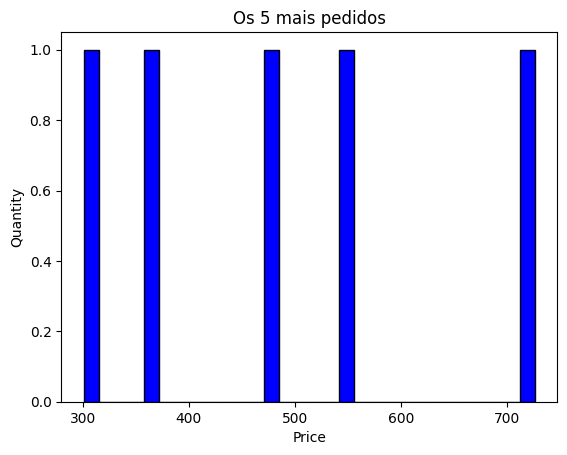

In [57]:
plt.hist(data['item_name'].value_counts().head(), bins=30, color='blue', edgecolor='black')
plt.title('Os 5 mais pedidos')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


In [22]:
data['item_name'].value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

R) Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

<Axes: xlabel='quantity', ylabel='item_price'>

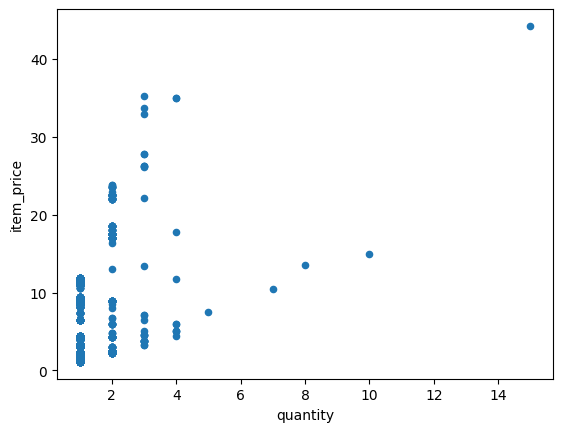

In [58]:
data.plot.scatter('quantity','item_price')

S) Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.


Em geral independete do preço os clientes não temo costume de repetir o mesmo pedido muitas vezes já que a maioria dos pedidos só foi feito uma ou 2 vezes

2 - Utilizando o dataset fetch_california_housing do sklearn (from sklearn.datasets import fetch_california_housing)

A) Descreva as variáveis encontradas no dataset (colunas)

In [76]:
california = fetch_california_housing(as_frame=True)
california = california.frame
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [81]:
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


B) Separe o dataset em treino (80%) e teste (20%) e realize os pré-processamentos necessários.

In [79]:
x = california.drop(['MedHouseVal'], axis=1)
y = california['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

C) Crie um modelo de regressão linear.

In [84]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

D) Mostre o desempenho do seu modelo através do RMSE, MAE e R2.

In [93]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [98]:
print('RMSE: ',rmse)
print('MAE:', mae)
print('R2:', r2)

RMSE:  0.7455813830127764
MAE: 0.5332001304956553
R2: 0.5757877060324508


E) Quais suas sugestões para melhorar o modelo? **Utilizar estratificação para obter melhores valores para a base de treino**